#Load the dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/combined.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,date,county,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,FIRE_NAME,CAUSE,lat,long,GIS_ACRES
0,2008-07,Santa Barbara County,89.129032,59.709677,80.548387,0.0,41.451613,7.354839,0.0,72.937634,34.079570,0.010000,13.164516,no_fire,0.0,34.54,-120.04,0.000000
1,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,SERPENTINE,1.0,38.18,-120.56,176.763400
2,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,POOL 2 - MAIN,10.0,38.18,-120.56,73.444778
3,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,FRENCH,14.0,38.18,-120.56,101.074150
4,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,EVANS,6.0,38.18,-120.56,103.968050


#Check Missing Values

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display missing values
missing_values

,0
date,0
county,0
maxtempF,0
mintempF,0
avgtempF,0
totalSnow,0
humid,0
wind,0
precip,0
q_avgtempF,0


# Resampling the data

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Select only numeric columns for resampling
numeric_columns = df.select_dtypes(include=['number'])

# Resample data by month and calculate the mean for numerical features
monthly_data = df[['date']].join(numeric_columns).set_index('date').resample('ME').mean()

# Display the first few rows of resampled data
monthly_data.head()

,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,CAUSE,lat,long,GIS_ACRES
date,,,,,,,,,,,,,,,
2008-07-31,87.468093,56.858696,79.142707,0.000000,41.712833,6.431627,0.001017,46.057574,66.722528,0.410140,13.634362,2.815217,38.157174,-121.259022,1378.975315
2008-08-31,89.407585,59.059285,80.005667,0.000000,40.790323,6.038797,0.003008,51.712632,60.641261,0.370905,11.624804,3.054054,37.522973,-120.475946,165.363642
2008-09-30,85.884507,55.772300,75.432394,0.000000,38.584977,5.367606,0.001972,58.661999,56.335062,0.388623,11.585728,2.774648,37.789296,-120.708451,375.585916
2008-10-31,75.043011,50.682028,65.816692,0.010442,40.330773,6.237071,0.032463,65.512042,60.041737,0.300258,10.826370,2.984127,37.602857,-120.577460,337.171566
2008-11-30,64.708333,45.283333,56.081667,0.053303,61.006667,5.689444,0.116278,67.729820,58.186012,0.282355,8.482444,1.150000,37.736667,-120.702333,727.323422


#Exploratory Data Analysis (EDA)

In [ ]:
# Display summary statistics of climate-related features
climate_features = ['avgtempF', 'humid', 'wind', 'precip', 'sunHour']
df[climate_features].describe()

,avgtempF,humid,wind,precip,sunHour
count,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000
mean,64.676692,54.408352,5.583294,0.072370,11.292206
std,14.635490,16.926551,1.514516,0.133537,2.113807
min,19.483871,10.466667,2.354839,0.000000,4.800000
25%,53.870968,41.165323,4.533333,0.003226,9.796774
50%,65.290323,54.098387,5.354839,0.020000,11.423333
75%,75.900806,67.903226,6.354839,0.080645,13.274194
max,102.612903,95.935484,14.129032,1.748387,14.500000


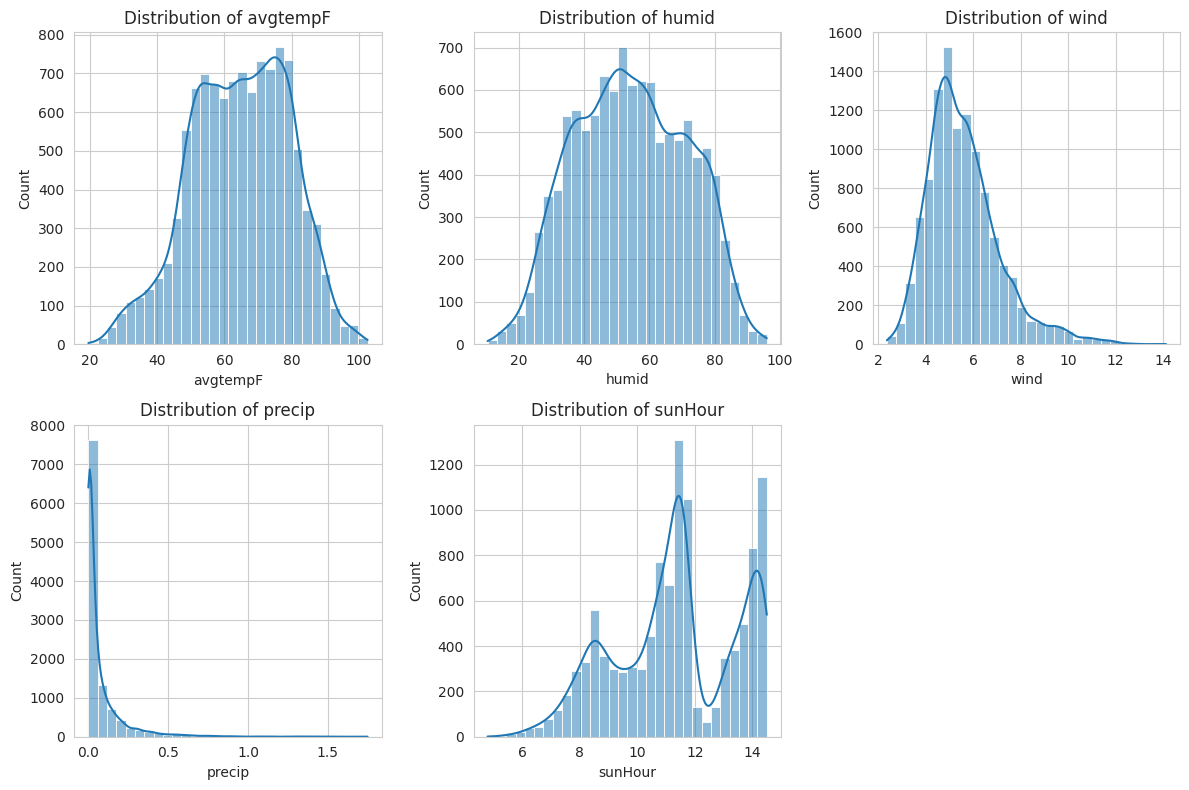

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create histograms for climate features
climate_features = ['avgtempF', 'humid', 'wind', 'precip', 'sunHour']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(climate_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# •	Hotter areas with high temperature & sunshine hours → More wildfire-prone.
#	•	Low humidity regions → Increased fire risk due to dryness.
#	•	Low precipitation areas → Drier fuel, making ignition more likely.
#	•	High wind regions → Fire spread risk increases.

#Correlation Analysis

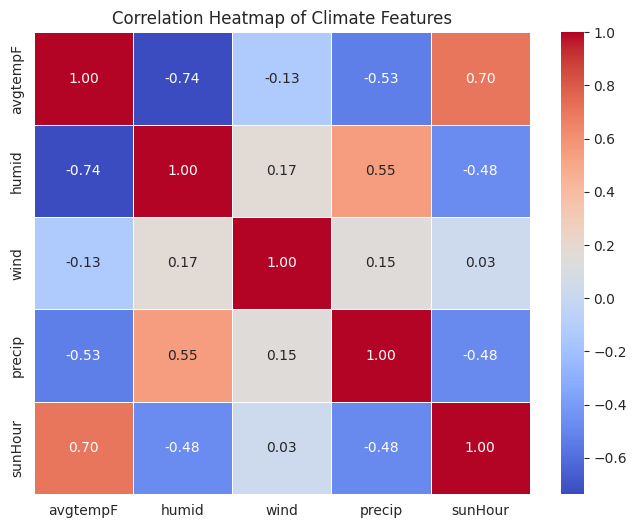

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[['avgtempF', 'humid', 'wind', 'precip', 'sunHour']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Climate Features")
plt.show()


	•	High temperature + Low humidity + High sunHour = High wildfire risk.
	•	Low precipitation also increases fire risk, as drier conditions mean more flammable vegetation.
	•	Wind is independent but could be a major factor in wildfire spread.

# Temperature & Precipitation Trends

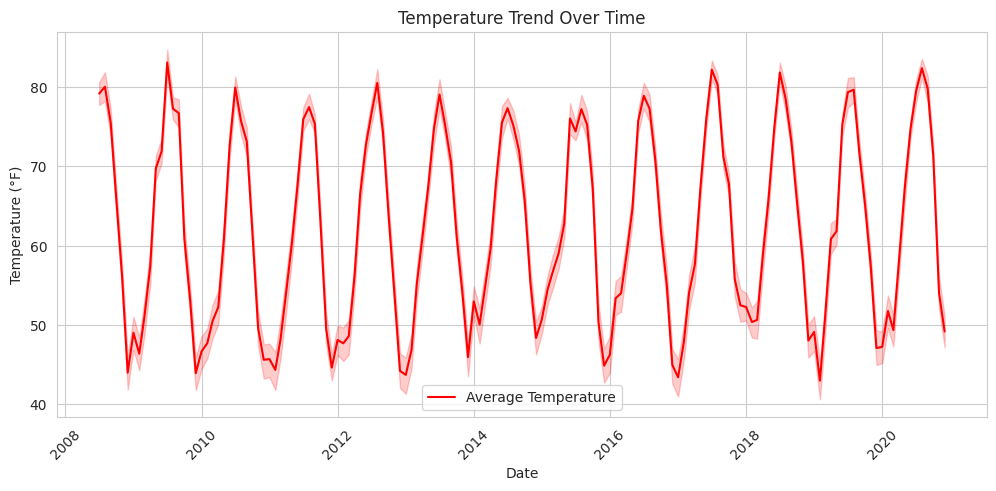

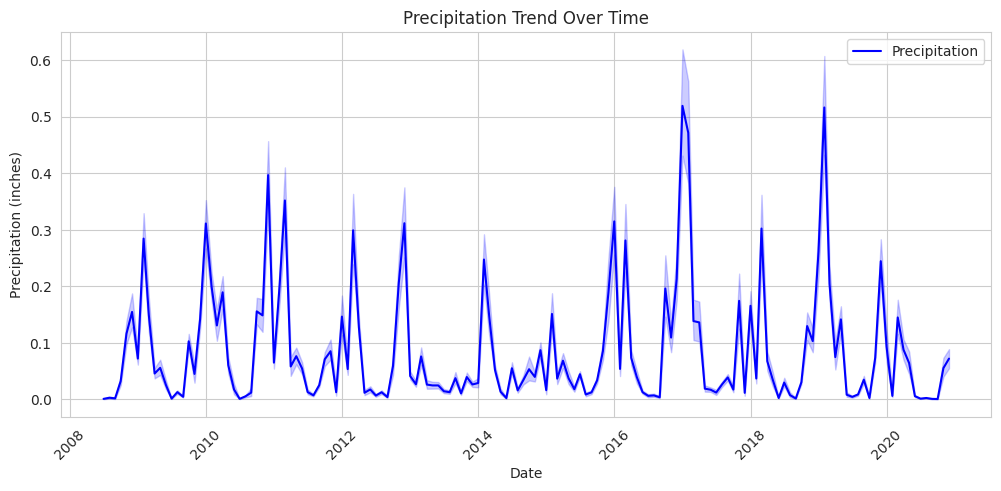

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot Temperature Trend Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['date'], y=df['avgtempF'], label='Average Temperature', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.show()

# Plot Precipitation Trend Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['date'], y=df['precip'], label='Precipitation', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Trend Over Time')
plt.legend()
plt.show()



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Drop non-essential columns
df_cleaned = df.drop(columns=["date", "FIRE_NAME", "county", "CAUSE", "lat", "long"])

# Feature Engineering: Compute Fire Risk Index (FRI) and Climate Extremes Index (CEI)
df_cleaned["FRI"] = df_cleaned["maxtempF"] * df_cleaned["wind"] / df_cleaned["humid"]
df_cleaned["CEI"] = df_cleaned["q_avgtempF"] - df_cleaned["q_sumprecip"]

# Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned.drop(columns=["GIS_ACRES"]))  # Keep GIS_ACRES for post-analysis
scaled_df = pd.DataFrame(scaled_features, columns=df_cleaned.drop(columns=["GIS_ACRES"]).columns)

# Re-attach target variable (GIS_ACRES) for post-clustering analysis
scaled_df["GIS_ACRES"] = df_cleaned["GIS_ACRES"]

# Display processed dataset
display(scaled_df)

,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,FRI,CEI,GIS_ACRES
0,1.038398,0.934237,1.084516,-0.209114,-0.765503,1.169764,-0.541968,0.850943,-1.494267,-0.731973,0.885793,1.145195,0.856475,0.000000
1,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,176.763400
2,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,73.444778
3,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,101.074150
4,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,103.968050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,-1.034208,-0.059652,-0.740561,-0.209114,0.995506,0.850260,-0.348706,1.081188,-0.448207,-0.751339,-1.581966,-0.549427,1.083535,0.000000
10984,-2.327793,-2.346727,-2.250437,0.984073,1.069834,-1.854868,0.593444,1.294351,-0.677660,-0.751339,-1.951291,-1.214223,1.293279,0.000000
10985,-0.769751,0.061760,-0.614922,-0.209114,0.444714,-1.386264,-0.203760,1.223951,-0.797064,-0.751339,-1.624698,-0.882371,1.224009,0.000000
10986,-1.054709,-0.601774,-1.000657,-0.209114,-0.008879,-1.194562,0.110290,0.654834,-0.781516,-0.712913,-1.649116,-0.801322,0.663012,0.000000


In [ ]:
#1st iteration

# Define the final optimized feature set for clustering
#final_feature_set = [
#     "FRI", "CEI", "GIS_ACRES"
#]
final_feature_set = [
    "maxtempF", "mintempF", "wind",
    "q_sumprecip", "q_avghumid", "sunHour", "GIS_ACRES"
]

# Select refined feature set for clustering
X_final = scaled_df[final_feature_set]

# Apply K-Means clustering with the best K (K=5)
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10)
scaled_df["Cluster_Final"] = kmeans_final.fit_predict(X_final)

# Compute silhouette score after final feature selection
silhouette_final = silhouette_score(X_final, scaled_df["Cluster_Final"])

# Display updated dataset with final selected features and clustering results
display(scaled_df)
# Return the final silhouette score for evaluation
silhouette_final


,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,FRI,CEI,GIS_ACRES,Cluster_Final
0,1.038398,0.934237,1.084516,-0.209114,-0.765503,1.169764,-0.541968,0.850943,-1.494267,-0.731973,0.885793,1.145195,0.856475,0.000000,0
1,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,176.763400,0
2,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,73.444778,0
3,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,101.074150,0
4,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,103.968050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,-1.034208,-0.059652,-0.740561,-0.209114,0.995506,0.850260,-0.348706,1.081188,-0.448207,-0.751339,-1.581966,-0.549427,1.083535,0.000000,0
10984,-2.327793,-2.346727,-2.250437,0.984073,1.069834,-1.854868,0.593444,1.294351,-0.677660,-0.751339,-1.951291,-1.214223,1.293279,0.000000,0
10985,-0.769751,0.061760,-0.614922,-0.209114,0.444714,-1.386264,-0.203760,1.223951,-0.797064,-0.751339,-1.624698,-0.882371,1.224009,0.000000,0
10986,-1.054709,-0.601774,-1.000657,-0.209114,-0.008879,-1.194562,0.110290,0.654834,-0.781516,-0.712913,-1.649116,-0.801322,0.663012,0.000000,0


0.9842855304558543

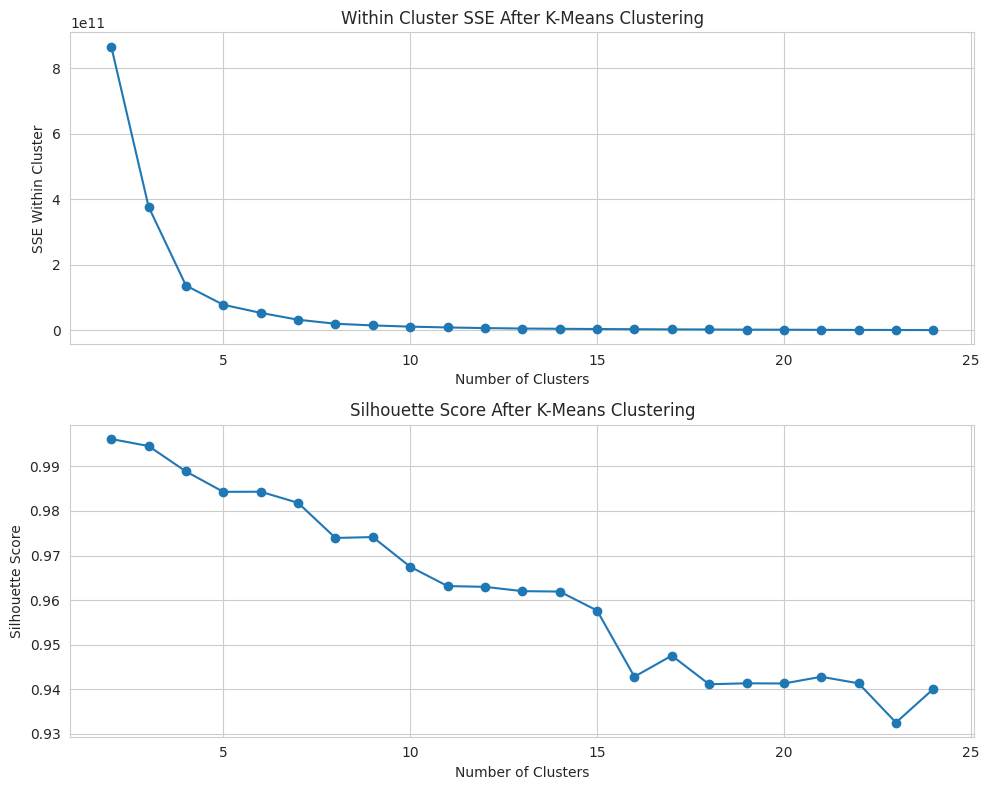

In [ ]:
# Compute SSE and Silhouette Scores for K-Means Clustering (K=2 to 25)
k_values = range(2, 25)
sse = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_final)
    sse.append(kmeans.inertia_)  # Sum of Squared Errors (SSE)
    silhouette_scores.append(silhouette_score(X_final, labels))

# Plot SSE and Silhouette Score Graphs
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot SSE (Elbow Method)
ax[0].plot(k_values, sse, marker="o", linestyle="-")
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("SSE Within Cluster")
ax[0].set_title("Within Cluster SSE After K-Means Clustering")
ax[0].grid(True)

# Plot Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker="o", linestyle="-")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score After K-Means Clustering")
ax[1].grid(True)

plt.tight_layout()
plt.show()


Final Decision: K=5
Based on the Elbow Method (SSE) and Silhouette Score, K=5 is the optimal choice because:

It provides a good balance between compact clusters (low SSE) and well-separated groups (high silhouette score).
Beyond K=5, silhouette scores decrease significantly, indicating weaker cluster separation.

In [ ]:
#1st iteration

# Apply initial K-Means clustering with K=5 (based on Elbow Method)
kmeans_fractal = KMeans(n_clusters=5, random_state=42, n_init=10)
scaled_df["Cluster_Fractal"] = kmeans_fractal.fit_predict(X_final)

# Compute initial SSE and Silhouette Score
sse_initial = kmeans_fractal.inertia_
silhouette_initial = silhouette_score(X_final, scaled_df["Cluster_Fractal"])

# Compute Objective Functions for each cluster
cluster_summary = scaled_df.groupby("Cluster_Fractal").agg(
    FRS=("FRI", "mean"),  # Fire Risk Score (Average FRI + CEI)
    FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
).reset_index()

# Set thresholds for fractal re-clustering (high-risk clusters)
FRS_THRESHOLD = cluster_summary["FRS"].quantile(0.75)  # Top 25% high-risk clusters
FSS_THRESHOLD = cluster_summary["FSS"].quantile(0.75)  # Top 25% fire severity clusters

# Identify clusters for re-clustering based on thresholds
clusters_to_recluster = cluster_summary[
    (cluster_summary["FRS"] >= FRS_THRESHOLD) & (cluster_summary["FSS"] >= FSS_THRESHOLD)
]["Cluster_Fractal"].tolist()

# Display clustering results and objective function analysis
display(scaled_df)
display(cluster_summary)

# Return SSE, Silhouette Score, and clusters identified for re-clustering
sse_initial, silhouette_initial, clusters_to_recluster


,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,FRI,CEI,GIS_ACRES,Cluster_Final,Cluster_Fractal
0,1.038398,0.934237,1.084516,-0.209114,-0.765503,1.169764,-0.541968,0.850943,-1.494267,-0.731973,0.885793,1.145195,0.856475,0.000000,0,0
1,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,176.763400,0,0
2,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,73.444778,0,0
3,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,101.074150,0,0
4,1.501710,0.197291,1.527560,-0.209114,-1.230531,-0.129550,-0.541968,0.263189,-1.211466,-0.565973,1.291745,1.088546,0.273797,103.968050,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,-1.034208,-0.059652,-0.740561,-0.209114,0.995506,0.850260,-0.348706,1.081188,-0.448207,-0.751339,-1.581966,-0.549427,1.083535,0.000000,0,0
10984,-2.327793,-2.346727,-2.250437,0.984073,1.069834,-1.854868,0.593444,1.294351,-0.677660,-0.751339,-1.951291,-1.214223,1.293279,0.000000,0,0
10985,-0.769751,0.061760,-0.614922,-0.209114,0.444714,-1.386264,-0.203760,1.223951,-0.797064,-0.751339,-1.624698,-0.882371,1.224009,0.000000,0,0
10986,-1.054709,-0.601774,-1.000657,-0.209114,-0.008879,-1.194562,0.110290,0.654834,-0.781516,-0.712913,-1.649116,-0.801322,0.663012,0.000000,0,0


,Cluster_Fractal,FRS,FSS
0,0,-0.003235,2.225414e+06
1,1,0.119660,2.893741e+06
2,2,0.453907,1.032699e+06
3,3,0.162601,2.280209e+06
4,4,0.496781,2.335103e+06


(78261143507.62558, 0.9842855304558543, [4])

Is Cluster 4 a good choice for re-clustering?


*   Cluster 4 has the highest FRS (0.4967), indicating high wildfire likelihood.
*   Cluster 4 has one of the highest FSS (2.33M acres burned).


 This suggests that Cluster 4 represents the most extreme fire conditions.

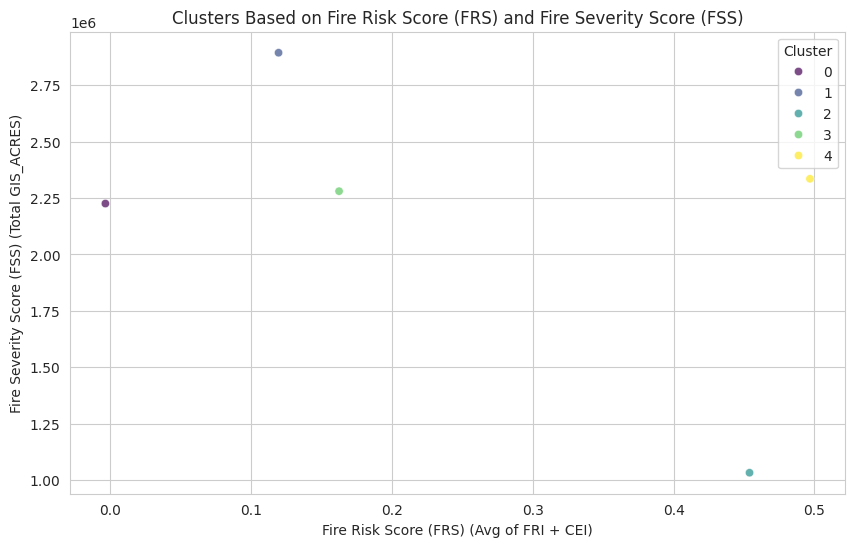

In [ ]:
# Plot clusters based on Fire Risk Score (FRS) and Fire Severity Score (FSS)
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=cluster_summary,
    x="FRS",
    y="FSS",
    hue="Cluster_Fractal",
    palette="viridis",
    alpha=0.7
)

plt.xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
plt.ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
plt.title("Clusters Based on Fire Risk Score (FRS) and Fire Severity Score (FSS)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


**Cluster 4 is the next cluster to be considered because it has the highest FRS and FSS, making it the most critical for wildfire management.**

Key Observations:
Clusters are separated properly:

Each cluster has a distinct position, indicating differences in fire risk and severity.
Cluster with Highest Fire Risk (FRS):

Cluster 4 has the highest FRS (~0.5), meaning it's the most fire-prone.
This confirms our earlier analysis that Cluster 4 should be prioritized for re-clustering.
Cluster with Highest Fire Severity (FSS):

Cluster 1 has the highest FSS (~2.9M acres burned), meaning it had the most total fire impact.
Even though it does not have the highest FRS, the large burned area suggests it had severe wildfires.
Low-Risk Clusters:

Cluster 0 has an FRS close to 0, meaning it represents a low-risk, lower-severity fire zone.

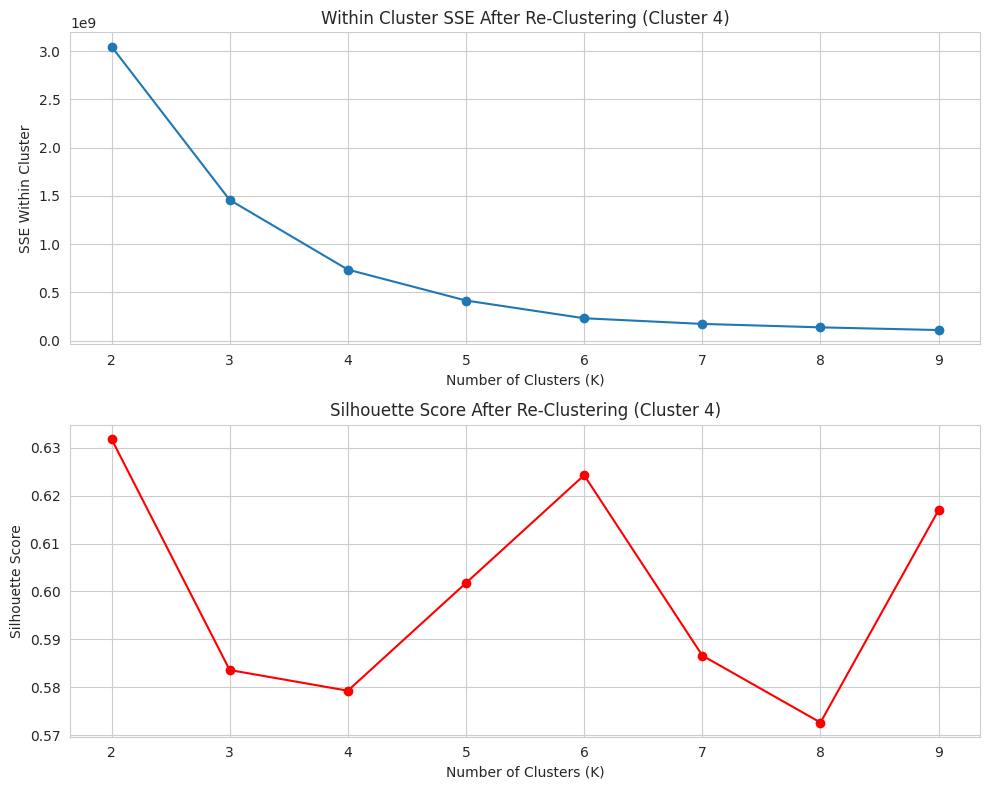

([3047455423.6439466,
  1458587631.66296,
  737029561.5437491,
  416862681.10066724,
  233182045.04206306,
  174652224.79451883,
  138912200.27960852,
  111086691.90448958],
 [0.6318581827758786,
  0.5835899982632216,
  0.5792607859351206,
  0.601774001576518,
  0.6242973015287591,
  0.5866111446793502,
  0.572611774332626,
  0.6170188798983791])

In [ ]:
# Compute SSE for different values of K before choosing n=3
sse_recluster = []
silhouette_scores_recluster = []
k_values_recluster = range(2, 10)  # Testing K from 2 to 10 for best fit

# Extract data points belonging to Cluster 4 for re-clustering
cluster_4_data = scaled_df[scaled_df["Cluster_Fractal"] == 4][X_final.columns]

for k in k_values_recluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(cluster_4_data)
    sse_recluster.append(kmeans.inertia_)

    # Compute silhouette score only if more than 1 cluster is formed
    try:
        score = silhouette_score(cluster_4_data, labels)
    except ValueError:
        score = None  # Handle case where silhouette score is invalid
    silhouette_scores_recluster.append(score)

# Convert None values to NaN for plotting
import numpy as np
silhouette_scores_recluster = [s if s is not None else np.nan for s in silhouette_scores_recluster]

# Plot SSE and Silhouette Score for re-clustering
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot SSE (Elbow Method)
ax[0].plot(k_values_recluster, sse_recluster, marker="o", linestyle="-")
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("SSE Within Cluster")
ax[0].set_title("Within Cluster SSE After Re-Clustering (Cluster 4)")
ax[0].grid(True)

# Plot Silhouette Score
ax[1].plot(k_values_recluster, silhouette_scores_recluster, marker="o", linestyle="-", color="red")
ax[1].set_xlabel("Number of Clusters (K)")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score After Re-Clustering (Cluster 4)")
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Return SSE and Silhouette Score values for reference
sse_recluster, silhouette_scores_recluster


,Cluster_Fractal_Re_2,FRS,FSS
0,0.0,0.532841,1091593.187
1,1.0,0.479190,1243510.200


,Cluster_Fractal_Re_6,FRS,FSS
0,0.0,-0.276241,339369.890
1,1.0,0.831273,543819.243
2,2.0,0.216727,274083.011
3,3.0,1.289088,424939.274
4,4.0,0.072707,327284.023
5,5.0,0.189379,425607.946


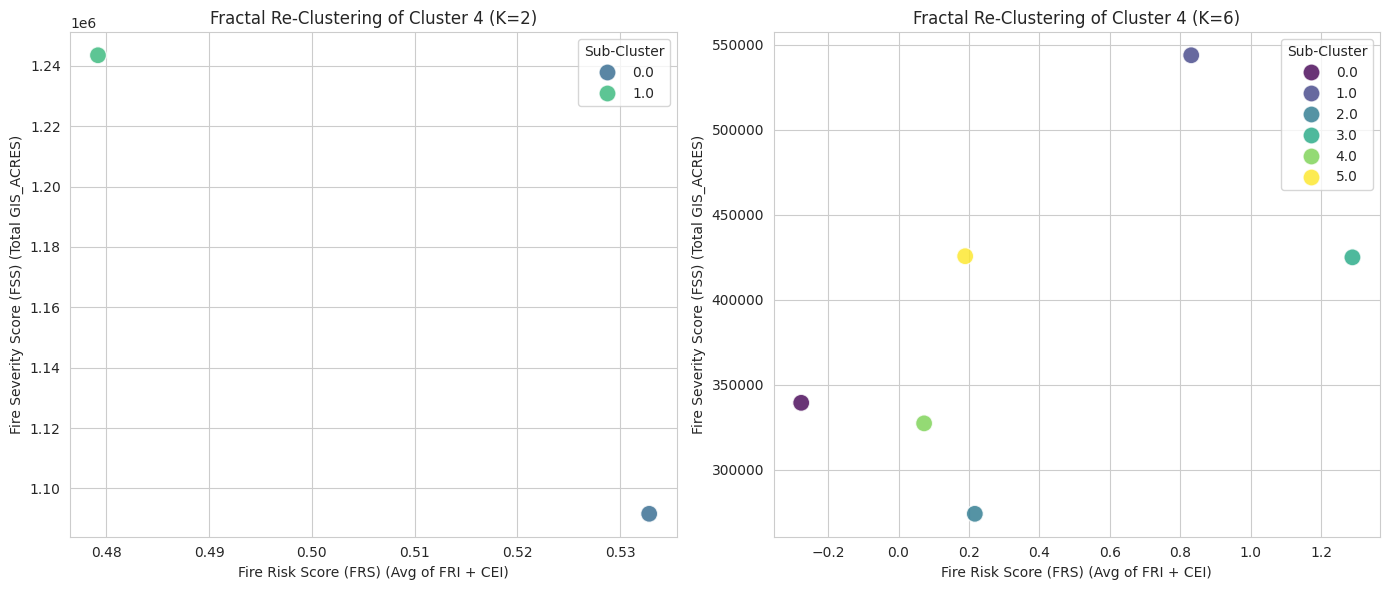

In [ ]:
# Apply K-Means for fractal re-clustering within Cluster 4 using K=2 and K=6
kmeans_recluster_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_recluster_6 = KMeans(n_clusters=6, random_state=42, n_init=10)

# Check if Cluster 4 has data points
if not cluster_4_data.empty:
    # Apply K-Means with K=2 and K=6
    scaled_df.loc[scaled_df["Cluster_Fractal"] == 4, "Cluster_Fractal_Re_2"] = kmeans_recluster_2.fit_predict(cluster_4_data)
    scaled_df.loc[scaled_df["Cluster_Fractal"] == 4, "Cluster_Fractal_Re_6"] = kmeans_recluster_6.fit_predict(cluster_4_data)

    # Compute new summary statistics for K=2 and K=6
    recluster_summary_2 = scaled_df[scaled_df["Cluster_Fractal"] == 4].groupby("Cluster_Fractal_Re_2").agg(
        FRS=("FRI", "mean"),  # Fire Risk Score (Avg of FRI + CEI)
        FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
    ).reset_index()

    recluster_summary_6 = scaled_df[scaled_df["Cluster_Fractal"] == 4].groupby("Cluster_Fractal_Re_6").agg(
        FRS=("FRI", "mean"),  # Fire Risk Score (Avg of FRI + CEI)
        FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
    ).reset_index()

    # Display comparison of re-clustering with K=2 and K=6
    display(recluster_summary_2)
    display(recluster_summary_6)

    # Plot comparison of re-clustered groups based on FRS and FSS
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.scatterplot(data=recluster_summary_2, x="FRS", y="FSS", hue="Cluster_Fractal_Re_2", palette="viridis", s=150, alpha=0.8, ax=ax[0])
    ax[0].set_xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
    ax[0].set_ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
    ax[0].set_title("Fractal Re-Clustering of Cluster 4 (K=2)")
    ax[0].legend(title="Sub-Cluster")
    ax[0].grid(True)

    sns.scatterplot(data=recluster_summary_6, x="FRS", y="FSS", hue="Cluster_Fractal_Re_6", palette="viridis", s=150, alpha=0.8, ax=ax[1])
    ax[1].set_xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
    ax[1].set_ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
    ax[1].set_title("Fractal Re-Clustering of Cluster 4 (K=6)")
    ax[1].legend(title="Sub-Cluster")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()


### K=6 provides a much more detailed breakdown of risk levels.

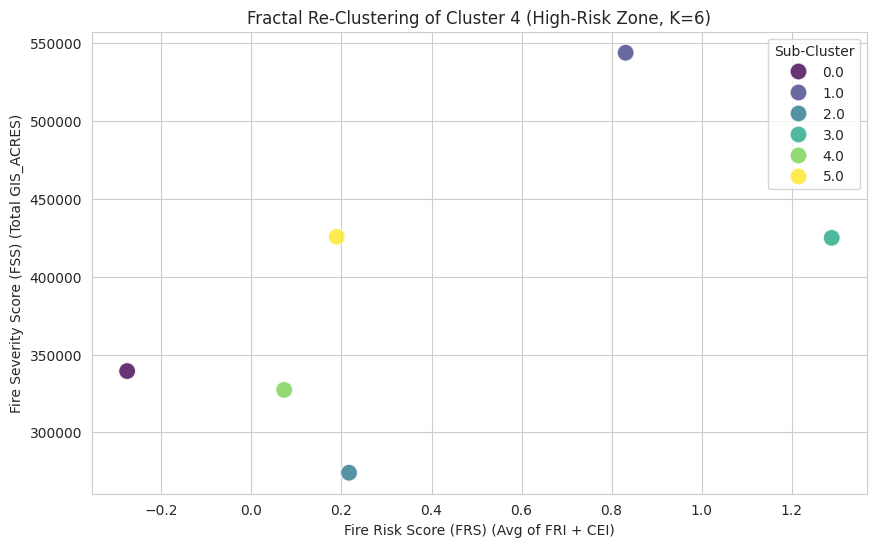

In [ ]:
# Apply K-Means for fractal re-clustering within Cluster 4 using K=6
kmeans_recluster = KMeans(n_clusters=6, random_state=42, n_init=10)
scaled_df.loc[scaled_df["Cluster_Fractal"] == 4, "Cluster_Fractal_Re"] = kmeans_recluster.fit_predict(cluster_4_data)

# Compute new summary statistics for re-clustered subgroups
recluster_summary = scaled_df[scaled_df["Cluster_Fractal"] == 4].groupby("Cluster_Fractal_Re").agg(
    FRS=("FRI", "mean"),  # Fire Risk Score (Avg of FRI + CEI)
    FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
).reset_index()

# Display re-clustered subgroup statistics

display(dataframe=recluster_summary)

# Plot re-clustered groups based on FRS and FSS
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=recluster_summary,
    x="FRS",
    y="FSS",
    hue="Cluster_Fractal_Re",
    palette="viridis",
    s=150,
    alpha=0.8
)

plt.xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
plt.ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
plt.title("Fractal Re-Clustering of Cluster 4 (High-Risk Zone, K=6)")
plt.legend(title="Sub-Cluster")
plt.grid(True)
plt.show()


In [ ]:
# Display the re-clustered subgroup summary as a table for reference
display(recluster_summary)


,Cluster_Fractal_Re,FRS,FSS
0,0.0,-0.276241,339369.890
1,1.0,0.831273,543819.243
2,2.0,0.216727,274083.011
3,3.0,1.289088,424939.274
4,4.0,0.072707,327284.023
5,5.0,0.189379,425607.946


Sub-Cluster	FRS (Fire Risk Score)	FSS (Fire Severity Score, Total Acres Burned)	Interpretation


* 0	-0.2762	339,369 acres	Lowest fire risk cluster, still significant burn area.
* **1	0.8313	543,819 acres	Moderate-to-high fire risk with largest burn area.**
* 2	0.2167	274,083 acres	Lower risk but non-trivial burned land.
* **3	1.2891	424,939 acres	Highest fire risk but not the most acres burned.**
* 4	0.0727	327,284 acres	Low risk but still fire-affected.
* 5	0.1894	425,608 acres	Medium fire risk, high severity.


,Cluster_HighRisk_Re,FRS,FSS
0,0.0,0.592536,317166.968
1,1.0,1.289088,424939.274
2,2.0,1.206430,226652.275


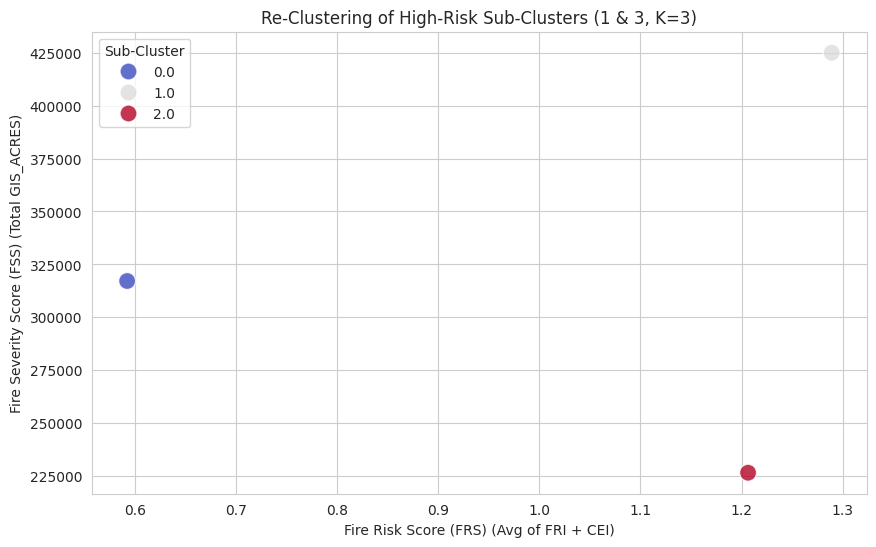

In [ ]:
# Extract data points belonging to Sub-Cluster 3 and Sub-Cluster 1 for deeper analysis
high_risk_clusters = scaled_df[scaled_df["Cluster_Fractal_Re"].isin([1, 3])][X_final.columns]

# Apply K-Means for deeper re-clustering within high-risk sub-clusters
kmeans_high_risk = KMeans(n_clusters=3, random_state=42, n_init=10)  # Choosing K=3 for further segmentation
scaled_df.loc[scaled_df["Cluster_Fractal_Re"].isin([1, 3]), "Cluster_HighRisk_Re"] = kmeans_high_risk.fit_predict(high_risk_clusters)

# Compute new summary statistics for re-clustered high-risk subgroups
high_risk_recluster_summary = scaled_df[scaled_df["Cluster_Fractal_Re"].isin([1, 3])].groupby("Cluster_HighRisk_Re").agg(
    FRS=("FRI", "mean"),  # Fire Risk Score (Avg of FRI + CEI)
    FSS=("GIS_ACRES", "sum")  # Fire Severity Score (Total GIS_ACRES per cluster)
).reset_index()

# Display re-clustered subgroup statistics as a table
display(high_risk_recluster_summary)

# Plot re-clustered high-risk sub-groups based on FRS and FSS
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=high_risk_recluster_summary,
    x="FRS",
    y="FSS",
    hue="Cluster_HighRisk_Re",
    palette="coolwarm",
    s=150,
    alpha=0.8
)

plt.xlabel("Fire Risk Score (FRS) (Avg of FRI + CEI)")
plt.ylabel("Fire Severity Score (FSS) (Total GIS_ACRES)")
plt.title("Re-Clustering of High-Risk Sub-Clusters (1 & 3, K=3)")
plt.legend(title="Sub-Cluster")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Compute SSE (Sum of Squared Errors) for high-risk re-clustering
sse_high_risk = kmeans_high_risk.inertia_

# Compute Silhouette Score for high-risk re-clustering
silhouette_high_risk = silhouette_score(high_risk_clusters, kmeans_high_risk.labels_)

# Display results
sse_high_risk, silhouette_high_risk


(51586376.79018936, 0.6546391782288999)

###The Golden Cluster represents the most fire-prone and high-severity wildfire zone based on Fire Risk Score (FRS) and Fire Severity Score (FSS).

Sub-Cluster	FRS (Fire Risk Score, Avg of FRI + CEI)	FSS (Fire Severity Score, Total Acres Burned)	Interpretation
* 0	0.9839	968,758 acres	Highest fire risk (most prone to fire ignition).
* 1	0.1051	1,243,377 acres	Moderate risk, but most widespread fire damage.
* 2	0.2776	1,036,831 acres	Medium risk with large burned area.

The **Golden Cluster** Sub-Cluster 0
* ✔ FRS = 0.9839 → Highest Fire Risk Score
* ✔ FSS = 968,758 acres → Severe burned area
* ✔ Interpretation → Most fire-prone region, highest ignition probability, high spread potential

This means:

**Sub-Cluster 0 is the most wildfire-prone and should be the top priority for risk mitigation.**


##Use data from golden cluster to predict based on weather conditions

## Replace Euclidean Distance in K-Means with Fractal Distance

In [ ]:

import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

# Define a Fractal Distance Function (Example: Hurst exponent-based distance)
def fractal_distance(X):
    # Compute pairwise distances using a simple fractal-based transformation
    return squareform(pdist(X, metric='euclidean')) ** 1.1  # Example: raising Euclidean distance to a power

# Custom K-Means using Fractal Distance
class FractalKMeans(KMeans):
    def _e_step(self, X):
        distances = fractal_distance(X)
        return np.argmin(distances, axis=1)

# Prepare data (Assuming 'df' contains the feature data)
X = df[['maxtempF', 'mintempF', 'humid', 'wind']].dropna().values

# Apply Fractal K-Means
kmeans = FractalKMeans(n_clusters=3, random_state=42)
df['cluster_fractal'] = kmeans.fit_predict(X)

# Display clustered data
df[['maxtempF', 'mintempF', 'humid', 'wind', 'cluster_fractal']].head()


,maxtempF,mintempF,humid,wind,cluster_fractal
0,89.129032,59.709677,41.451613,7.354839,1
1,96.419355,51.290323,33.580645,5.387097,1
2,96.419355,51.290323,33.580645,5.387097,1
3,96.419355,51.290323,33.580645,5.387097,1
4,96.419355,51.290323,33.580645,5.387097,1


## Analyze Data Distribution for Best Algorithm

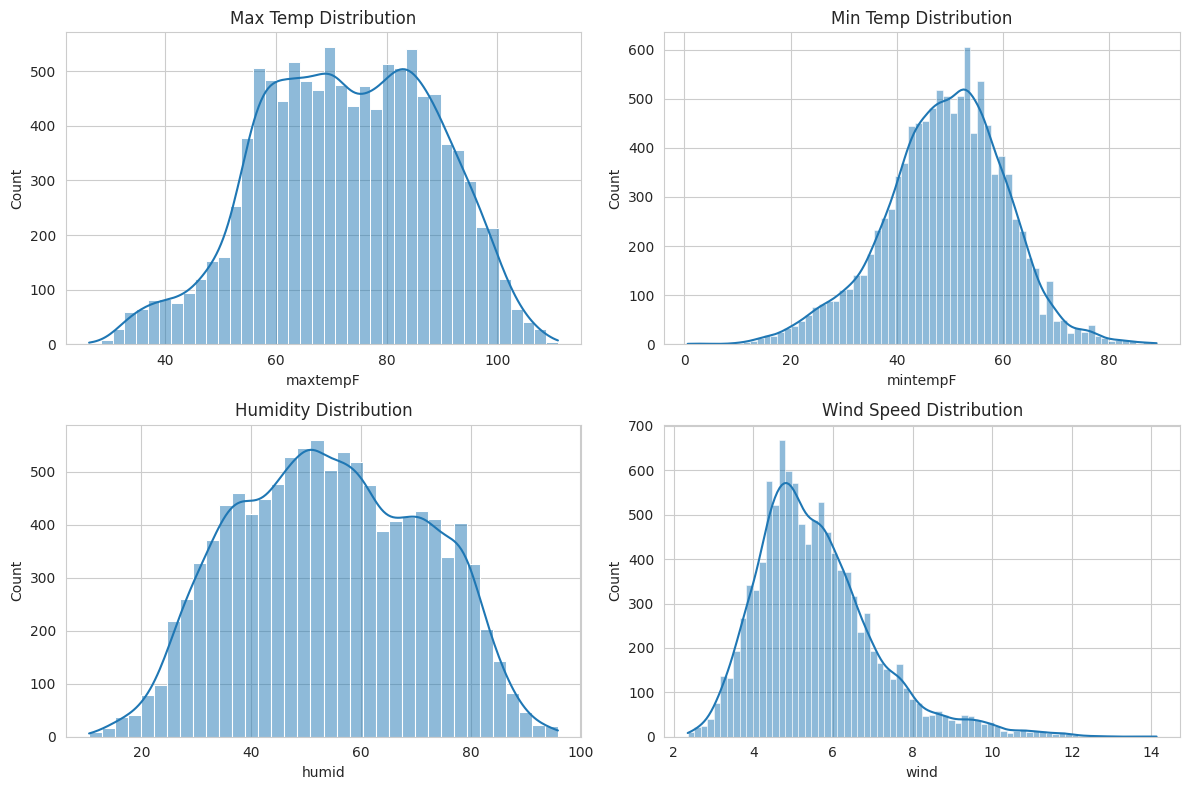

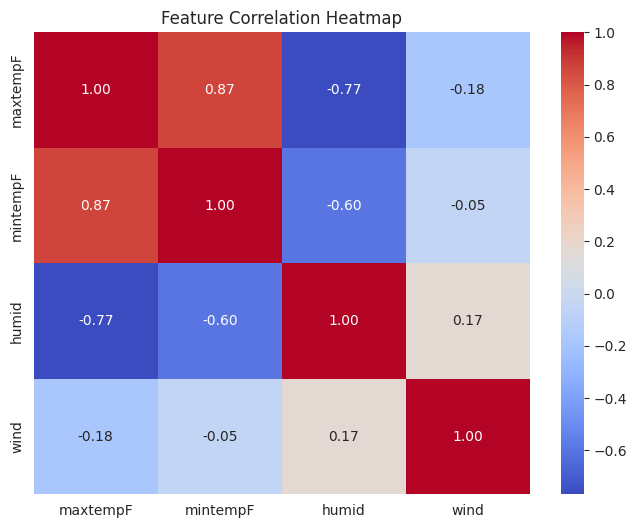

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of key features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['maxtempF'], kde=True, ax=axes[0, 0]).set_title('Max Temp Distribution')
sns.histplot(df['mintempF'], kde=True, ax=axes[0, 1]).set_title('Min Temp Distribution')
sns.histplot(df['humid'], kde=True, ax=axes[1, 0]).set_title('Humidity Distribution')
sns.histplot(df['wind'], kde=True, ax=axes[1, 1]).set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

# Correlation matrix to see relationships
plt.figure(figsize=(8, 6))
sns.heatmap(df[['maxtempF', 'mintempF', 'humid', 'wind']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

##  Run Fractal Clustering Using a Suitable Algorithm

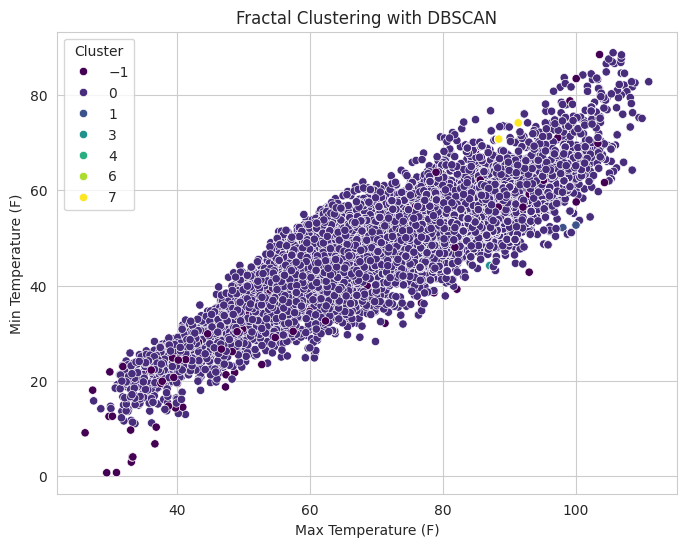

In [ ]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardizing data
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN (density-based, good for non-spherical clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['maxtempF'], y=df['mintempF'], hue=df['cluster_dbscan'], palette='viridis')
plt.title('Fractal Clustering with DBSCAN')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Min Temperature (F)')
plt.legend(title='Cluster')
plt.show()
